In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.Multi_Layer_Network as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
import numpy as np
import matplotlib.pyplot as plt
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
batch_size = 1000
max_epoch = 10
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)

In [3]:
n_xavier_normal = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Xavier_Normal.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)
n_xavier_normal.learning(
    max_epoch=max_epoch, 
    data=data, 
    batch_size=batch_size, 
    print_period=5, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

Multi Layer Network Model - ID: BQ1T5AY3
-- Learning Started --
Epoch   0 Completed - Train Error:6.06643 - Validation Error:6.14365 - Test Accuracy:0.10240 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:0.07147 - Validation Error:0.10933 - Test Accuracy:0.96460 <== Minimal Val. Error
Epoch  10 Completed - Train Error:0.04257 - Validation Error:0.13030 - Test Accuracy:0.96340

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  5 (Fold:  0 & Epoch:  5) - Train Error:0.07147 - Validation Error:0.10933 - Test Accuracy:0.96460

Fold:  1
Epoch   5 Completed - Train Error:0.04787 - Validation Error:0.10763 - Test Accuracy:0.96520
Epoch  10 Completed - Train Error:0.05478 - Validation Error:0.10117 - Test Accuracy:0.96890

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 12 (Fold:  1 & Epoch:  2) - Train Error:0.02677 - Validation Error:0.06188 - Test Accuracy:0.96920

Fold:  2
Epoch   5 Completed - Train Error:0.01526 - Va

In [4]:
n_xavier_uniform = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Xavier_Uniform.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)
n_xavier_uniform.learning(
    max_epoch=max_epoch, 
    data=data, 
    batch_size=batch_size, 
    print_period=5, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

Multi Layer Network Model - ID: PNZCBDVP
-- Learning Started --
Epoch   0 Completed - Train Error:8.19187 - Validation Error:8.26463 - Test Accuracy:0.13500 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:0.07729 - Validation Error:0.12358 - Test Accuracy:0.96280 <== Minimal Val. Error
Epoch  10 Completed - Train Error:0.04316 - Validation Error:0.11419 - Test Accuracy:0.96940 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 10 (Fold:  0 & Epoch: 10) - Train Error:0.04316 - Validation Error:0.11419 - Test Accuracy:0.96940

Fold:  1
Epoch   5 Completed - Train Error:0.02563 - Validation Error:0.07479 - Test Accuracy:0.96890
Epoch  10 Completed - Train Error:0.01990 - Validation Error:0.09737 - Test Accuracy:0.96890

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 13 (Fold:  1 & Epoch:  3) - Train Error:0.02761 - Validation Error:0.05980 - Test Accuracy:0.97000

Fold:  2
Epoch   5 Completed - T

In [5]:
n_he_normal = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.He_Normal.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)
n_he_normal.learning(
    max_epoch=max_epoch, 
    data=data, 
    batch_size=batch_size, 
    print_period=5, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

Multi Layer Network Model - ID: Q718J4UA
-- Learning Started --
Epoch   0 Completed - Train Error:18.80416 - Validation Error:18.67980 - Test Accuracy:0.08680 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:0.11752 - Validation Error:0.15582 - Test Accuracy:0.94770 <== Minimal Val. Error
Epoch  10 Completed - Train Error:0.07204 - Validation Error:0.12878 - Test Accuracy:0.96070

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  9 (Fold:  0 & Epoch:  9) - Train Error:0.06665 - Validation Error:0.12874 - Test Accuracy:0.95970

Fold:  1
Epoch   5 Completed - Train Error:0.04889 - Validation Error:0.10250 - Test Accuracy:0.96040
Epoch  10 Completed - Train Error:0.03230 - Validation Error:0.13254 - Test Accuracy:0.96330

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 11 (Fold:  1 & Epoch:  1) - Train Error:0.04729 - Validation Error:0.06990 - Test Accuracy:0.96080

Fold:  2
Epoch   5 Completed - Train Error:0.01827 - 

In [6]:
n_he_uniform = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.He_Uniform.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)
n_he_uniform.learning(
    max_epoch=max_epoch, 
    data=data, 
    batch_size=batch_size, 
    print_period=5, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

Multi Layer Network Model - ID: OC7OKTF2
-- Learning Started --
Epoch   0 Completed - Train Error:23.85012 - Validation Error:24.17943 - Test Accuracy:0.05900 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:0.09697 - Validation Error:0.18978 - Test Accuracy:0.94740 <== Minimal Val. Error
Epoch  10 Completed - Train Error:0.04293 - Validation Error:0.15553 - Test Accuracy:0.96090 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 10 (Fold:  0 & Epoch: 10) - Train Error:0.04293 - Validation Error:0.15553 - Test Accuracy:0.96090

Fold:  1
Epoch   5 Completed - Train Error:0.05979 - Validation Error:0.09944 - Test Accuracy:0.95990
Epoch  10 Completed - Train Error:0.02437 - Validation Error:0.10018 - Test Accuracy:0.96500

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 11 (Fold:  1 & Epoch:  1) - Train Error:0.03214 - Validation Error:0.05762 - Test Accuracy:0.96160

Fold:  2
Epoch   5 Completed -

In [7]:
neural_networks = {
    "xavier_normal": n_xavier_normal, 
    "xavier_uniform": n_xavier_uniform,     
    "he_normal": n_he_normal,         
    "he_uniform": n_he_uniform
}

In [10]:
for key, neural_network in neural_networks.items():
    print("{:10s} - Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
        key, 
        neural_network.min_validation_error_epoch,
        neural_network.min_train_error,
        neural_network.min_validation_error,
        neural_network.test_accuracy_at_min_validation_error_epoch
    ))

print()
    
for key, neural_network in neural_networks.items():    
    print("{:10s} - Mean of Min Va. Error For All Folds:{:7.5f}".format(
        key,         
        neural_network.mean_min_validation_error_for_all_folds
    ))

xavier_normal - Epoch:111, Min Train Error:0.00076, Min Validation Error:0.00081, Test Accuracy:0.97810
xavier_uniform - Epoch:111, Min Train Error:0.00204, Min Validation Error:0.00095, Test Accuracy:0.97610
he_normal  - Epoch:111, Min Train Error:0.01423, Min Validation Error:0.00554, Test Accuracy:0.97390
he_uniform - Epoch: 51, Min Train Error:0.00162, Min Validation Error:0.00057, Test Accuracy:0.97280

xavier_normal - Mean of Min Va. Error For All Folds:0.01885
xavier_uniform - Mean of Min Va. Error For All Folds:0.02119
he_normal  - Mean of Min Va. Error For All Folds:0.02663
he_uniform - Mean of Min Va. Error For All Folds:0.02138


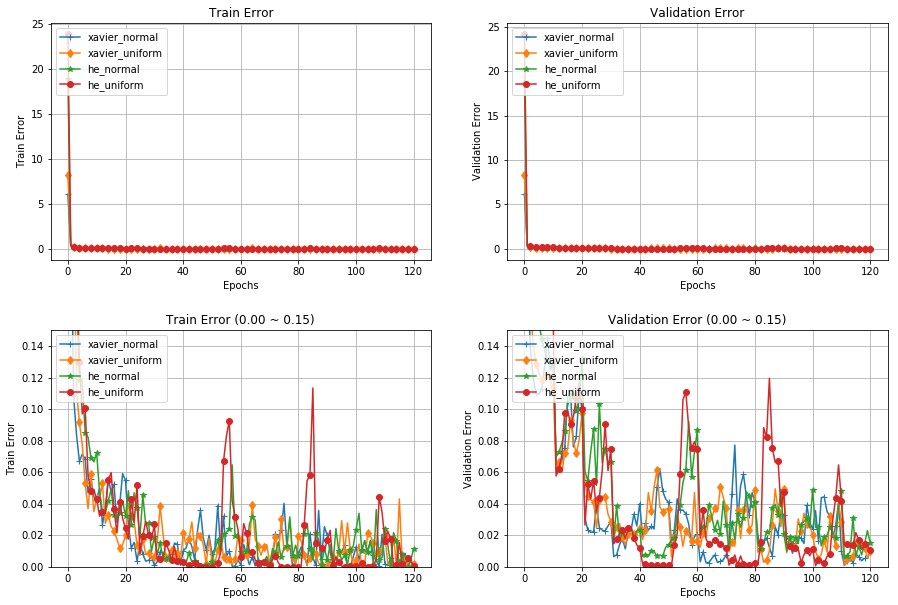

In [13]:
markers = {
    "xavier_normal": "+", 
    "xavier_uniform": "d",     
    "he_normal": "*",         
    "he_uniform": "o"
}

epoch_list = np.arange(len(neural_networks["xavier_normal"].train_error_list))

f, axarr = plt.subplots(2, 2, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0, 0].plot(epoch_list, neural_network.train_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 0].set_ylabel('Train Error')
axarr[0, 0].set_xlabel('Epochs')
axarr[0, 0].grid(True)
axarr[0, 0].set_title('Train Error')
axarr[0, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0, 1].plot(epoch_list, neural_network.validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 1].set_ylabel('Validation Error')
axarr[0, 1].set_xlabel('Epochs')
axarr[0, 1].grid(True)
axarr[0, 1].set_title('Validation Error')
axarr[0, 1].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 0].plot(epoch_list, neural_network.train_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 0].set_ylabel('Train Error')
axarr[1, 0].set_xlabel('Epochs')
axarr[1, 0].grid(True)
axarr[1, 0].set_ylim(0, 0.15)
axarr[1, 0].set_title('Train Error (0.00 ~ 0.15)')
axarr[1, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 1].plot(epoch_list, neural_network.validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 1].set_ylabel('Validation Error')
axarr[1, 1].set_xlabel('Epochs')
axarr[1, 1].grid(True)
axarr[1, 1].set_ylim(0, 0.15)
axarr[1, 1].set_title('Validation Error (0.00 ~ 0.15)')
axarr[1, 1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)

plt.show()

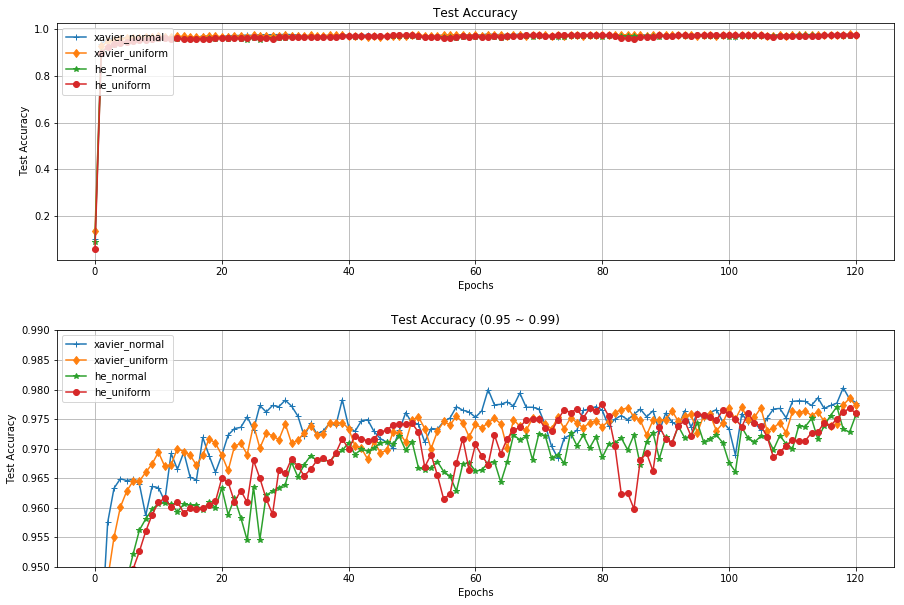

In [15]:
f, axarr = plt.subplots(2, 1, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_network.test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[0].set_ylabel('Test Accuracy')
axarr[0].set_xlabel('Epochs')
axarr[0].grid(True)
axarr[0].set_title('Test Accuracy')
axarr[0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1].plot(epoch_list, neural_network.test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[1].set_ylabel('Test Accuracy')
axarr[1].set_xlabel('Epochs')
axarr[1].grid(True)
axarr[1].set_ylim(0.95, 0.99)
axarr[1].set_title('Test Accuracy (0.95 ~ 0.99)')
axarr[1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)
plt.show()

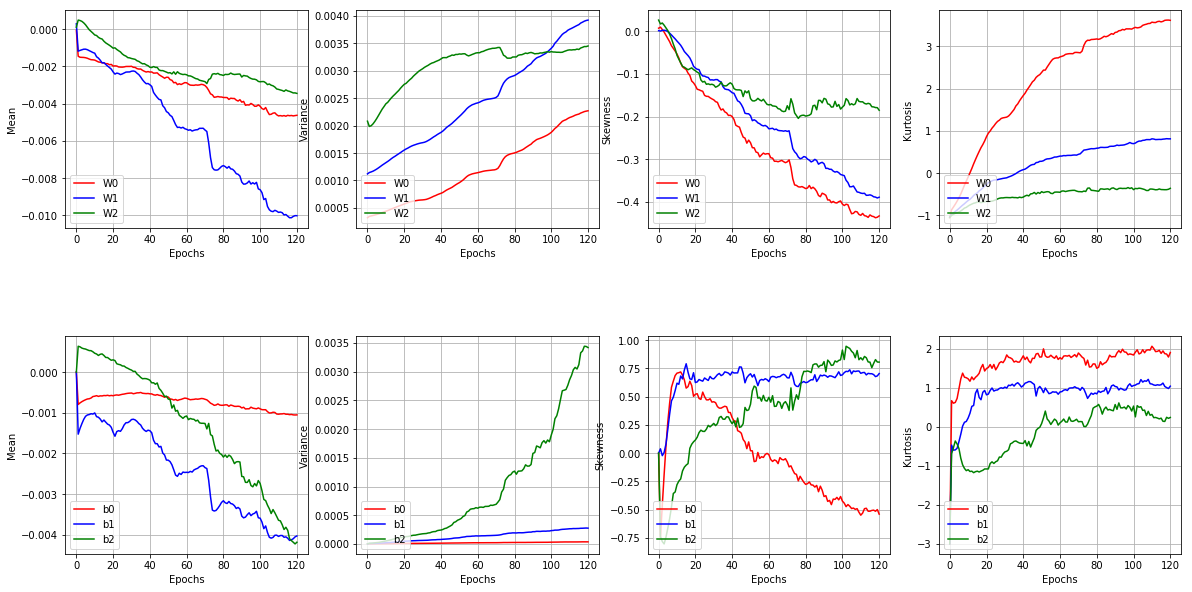

In [16]:
neural_networks["xavier_normal"].draw_param_description(figsize=(20, 10))

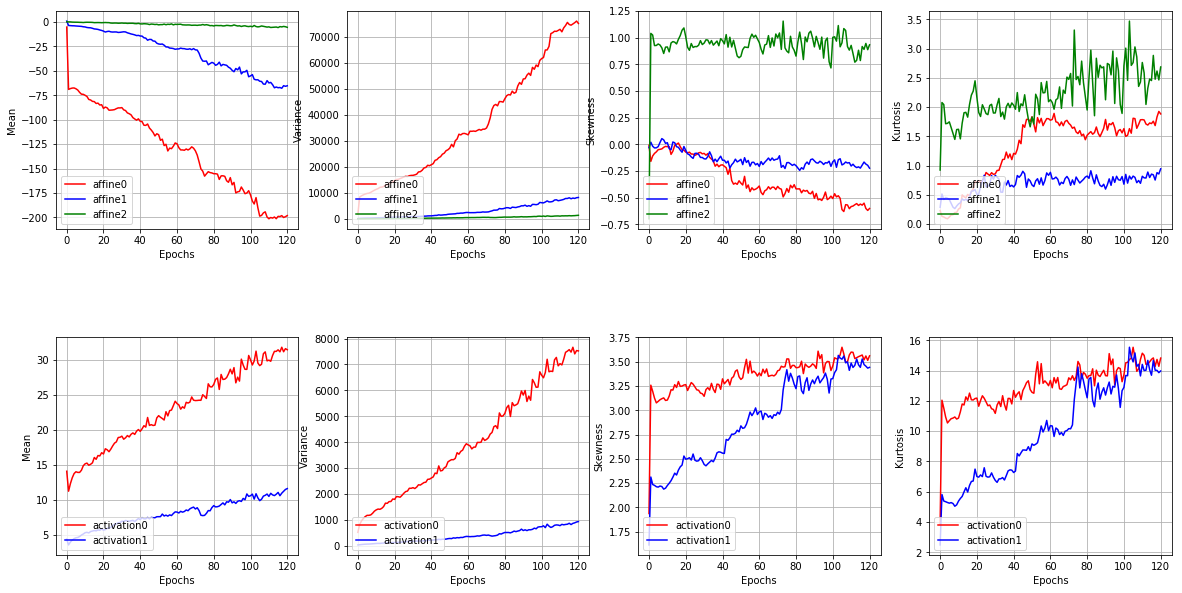

In [17]:
neural_networks["xavier_normal"].draw_output_description(figsize=(20, 10))